In [1]:
cat("Difference-in-Differences (DiD)")

Difference-in-Differences (DiD)

In [2]:
cat("

Difference-in-Differences (DiD) is a quasi-experimental method that estimates causal effects by comparing 
the change in outcomes over time between a treatment group and a control group.

Compare two differences:

First difference: Change over time in the treatment group

Second difference: Change over time in the control group

DiD estimate = Difference between these two differences

Intuition: 

The control group shows what would have happened to the treatment group without treatment (the counterfactual trend).

Treatment Group:  Before = 20 → After = 35 (change = +15)

Control Group:    Before = 15 → After = 20 (change = +5)

DiD = (35 - 20) - (20 - 15) = 15 - 5 = 10

")



Difference-in-Differences (DiD) is a quasi-experimental method that estimates causal effects by comparing 
the change in outcomes over time between a treatment group and a control group.

Compare two differences:

First difference: Change over time in the treatment group

Second difference: Change over time in the control group

DiD estimate = Difference between these two differences

Intuition: 

The control group shows what would have happened to the treatment group without treatment (the counterfactual trend).

Treatment Group:  Before = 20 → After = 35 (change = +15)

Control Group:    Before = 15 → After = 20 (change = +5)

DiD = (35 - 20) - (20 - 15) = 15 - 5 = 10



In [3]:
cat("

DiD = (Y_treated,after - Y_treated,before) - (Y_control,after - Y_control,before)
    
Y = β₀ + β₁·Treated + β₂·Post + β₃·(Treated × Post) + ε

Where:

β₃ = DiD estimator (treatment effect)

Treated = 1 if in treatment group, 0 otherwise

Post = 1 if after treatment, 0 before

Treated × Post = interaction term

")



DiD = (Y_treated,after - Y_treated,before) - (Y_control,after - Y_control,before)
    
Y = β₀ + β₁·Treated + β₂·Post + β₃·(Treated × Post) + ε

Where:

β₃ = DiD estimator (treatment effect)

Treated = 1 if in treatment group, 0 otherwise

Post = 1 if after treatment, 0 before

Treated × Post = interaction term



In [4]:
cat("

Classic Example: Minimum Wage and Employment

Card & Krueger (1994) Study

Research question: Does raising minimum wage reduce employment?

Setting:

Treatment: New Jersey raised minimum wage (April 1992)

Control: Pennsylvania kept minimum wage the same

Outcome: Fast-food employment levels

They used Difference-in-Differences to ask:

“Did employment in New Jersey (treated) change more than in Pennsylvania (control) after the minimum wage increase?”

")




Classic Example: Minimum Wage and Employment

Card & Krueger (1994) Study

Research question: Does raising minimum wage reduce employment?

Setting:

Treatment: New Jersey raised minimum wage (April 1992)

Control: Pennsylvania kept minimum wage the same

Outcome: Fast-food employment levels

They used Difference-in-Differences to ask:

“Did employment in New Jersey (treated) change more than in Pennsylvania (control) after the minimum wage increase?”



In [5]:
# Simulate Card & Krueger style data
set.seed(123)
n_stores <- 400

# Create dataset
did_data <- data.frame(
  store_id = rep(1:n_stores, 2),
  state = rep(c(rep("NJ", n_stores/2), rep("PA", n_stores/2)), 2),
  time = c(rep("Before", n_stores), rep("After", n_stores))
)

# Generate employment levels
did_data$employment <- with(did_data, 
  20 +  # Baseline
  3 * (state == "NJ") +  # NJ stores slightly larger
  2 * (time == "After") +  # General time trend
  5 * (state == "NJ" & time == "After") +  # Treatment effect
  rnorm(n_stores * 2, 0, 3)  # Noise
)

# Mark treatment
did_data$treated <- ifelse(did_data$state == "NJ", 1, 0)
did_data$post <- ifelse(did_data$time == "After", 1, 0)

# View structure
head(did_data, 4)
tail(did_data, 4)

cat("

Now we have:

treated: 1 for NJ (treatment group), 0 for PA (control)

post: 1 for After, 0 for Before

These dummy variables are standard inputs to a DiD regression:

employment = β0 + β1 ​treated + β2 ​ post + β3 ​ (treated×post) + ϵ

β3 = the Difference-in-Differences estimate, i.e., the causal effect of the NJ wage policy.

")

,store_id,state,time,employment,treated,post
,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,1,NJ,Before,21.31857,1,0
2,2,NJ,Before,22.30947,1,0
3,3,NJ,Before,27.67612,1,0
4,4,NJ,Before,23.21153,1,0


,store_id,state,time,employment,treated,post
,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
797,397,PA,After,23.16510,0,1
798,398,PA,After,20.66219,0,1
799,399,PA,After,22.69334,0,1
800,400,PA,After,23.94254,0,1




Now we have:

treated: 1 for NJ (treatment group), 0 for PA (control)

post: 1 for After, 0 for Before

These dummy variables are standard inputs to a DiD regression:

employment = β0 + β1 ​treated + β2 ​ post + β3 ​ (treated×post) + ϵ

β3 = the Difference-in-Differences estimate, i.e., the causal effect of the NJ wage policy.




Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# A tibble: 4 × 3
  state time   avg_employment
  <chr> <chr>           <dbl>
1 NJ    After            30.1
2 NJ    Before           23.0
3 PA    After            21.9
4 PA    Before           20.1


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


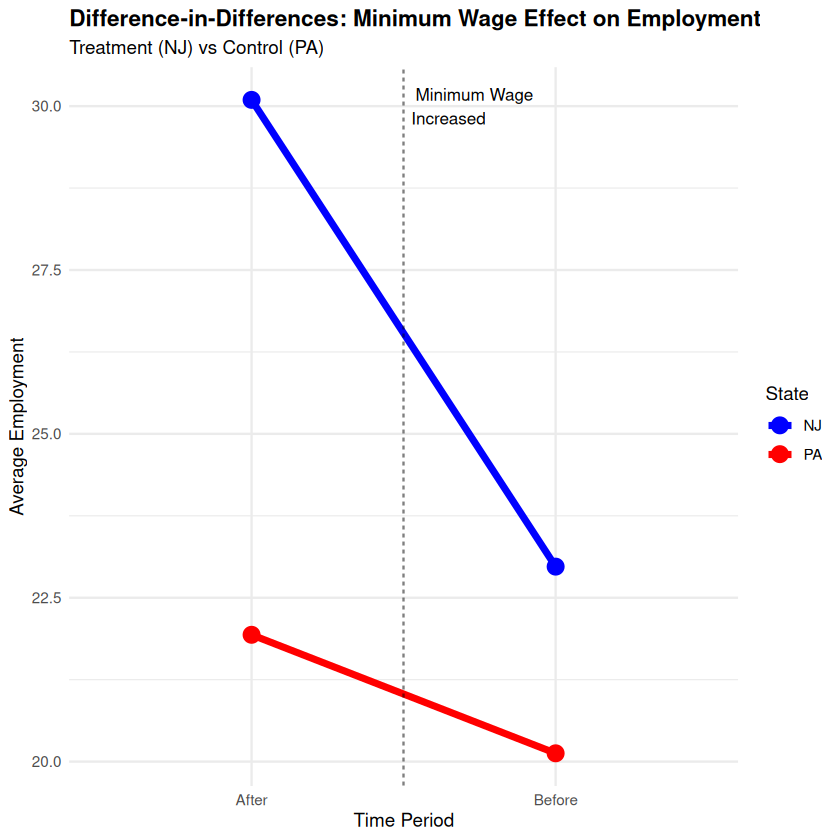

In [6]:
library(ggplot2)
library(dplyr)

# Compute means
means <- did_data %>%
  group_by(state, time) %>%
  summarise(avg_employment = mean(employment), .groups = 'drop')

print(means)

# Create DiD plot
ggplot(means, aes(x = time, y = avg_employment, group = state, color = state)) +
  geom_line(size = 1.5) +
  geom_point(size = 4) +
  geom_vline(xintercept = 1.5, linetype = "dashed", alpha = 0.5) +
  annotate("text", x = 1.5, y = 30, label = "Minimum Wage\nIncreased", 
           hjust = -0.1, size = 3.5) +
  labs(
    title = "Difference-in-Differences: Minimum Wage Effect on Employment",
    subtitle = "Treatment (NJ) vs Control (PA)",
    x = "Time Period",
    y = "Average Employment",
    color = "State"
  ) +
  scale_color_manual(values = c("NJ" = "blue", "PA" = "red")) +
  theme_minimal() +
  theme(plot.title = element_text(face = "bold"))

In [7]:
cat("

Next step in the analysis :

To actually estimate the effect from the simulated data:

did_model <- lm(employment ~ treated * post, data = did_data)
summary(did_model)

The coefficient for treated:post should be approximately +5, 
confirming that the DiD estimator recovers the causal effect you simulated.

")



Next step in the analysis :

To actually estimate the effect from the simulated data:

did_model <- lm(employment ~ treated * post, data = did_data)
summary(did_model)

The coefficient for treated:post should be approximately +5, 
confirming that the DiD estimator recovers the causal effect you simulated.



In [8]:
did_model <- lm(employment ~ treated * post, data = did_data)
summary(did_model)


Call:
lm(formula = employment ~ treated * post, data = did_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.5247 -1.8976 -0.0183  1.9558  9.7488 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   20.1264     0.2084  96.555  < 2e-16 ***
treated        2.8479     0.2948   9.661  < 2e-16 ***
post           1.8080     0.2948   6.133 1.36e-09 ***
treated:post   5.3131     0.4169  12.745  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.948 on 796 degrees of freedom
Multiple R-squared:  0.6236,	Adjusted R-squared:  0.6221 
F-statistic: 439.5 on 3 and 796 DF,  p-value: < 2.2e-16


In [9]:
cat("

| Concept                        | Meaning                                                                |
| :----------------------------- | :--------------------------------------------------------------------- |
| “Before vs After”              | Captures general time trends                                           |
| “NJ vs PA”                     | Captures baseline group differences                                    |
| “Interaction (treated × post)” | Isolates the **policy’s causal effect** beyond trends or baseline gaps |

")



| Concept                        | Meaning                                                                |
| :----------------------------- | :--------------------------------------------------------------------- |
| “Before vs After”              | Captures general time trends                                           |
| “NJ vs PA”                     | Captures baseline group differences                                    |
| “Interaction (treated × post)” | Isolates the **policy’s causal effect** beyond trends or baseline gaps |



In [10]:
cat("
| Term                    | Estimate                                                                                                                                                         
| ----------------------- | -----------------------------------------------------------------------------------------------------------------------------------------------------------------
| **(Intercept)** = 20.13 | Average employment **in control group (PA)** *before* the policy. This is the baseline.                                                                         
| **treated** = 2.85      | Before the policy, NJ stores had **≈ 2.85 more employees** than PA stores (baseline group difference).                                                         
| **post** = 1.81         | After the policy, employment in **PA** (the control) rose by ≈ 1.81 (common time trend).                                                                         
| **treated:post** = 5.31 | **Causal effect**: NJ’s employment increased by **5.31 more** than PA’s between before → after. 
                            This is the **DiD estimate** of the minimum-wage policy’s impact. 
")

cat("

🧠 Interpretation

This term (treated:post) is the Difference-in-Differences estimator — it measures how much more employment increased in New Jersey (treated) than in Pennsylvania (control) after the policy change.

Estimate = 5.31 → NJ employment rose by about 5.3 more workers per store, relative to PA.

Standard error = 0.42 → very small relative to the estimate.

t value = 12.7 → extremely large (anything > 2 is usually significant).

p-value < 2 × 10⁻¹⁶ → far smaller than any standard significance threshold (e.g., 0.05, 0.01, 0.001).

")


| Term                    | Estimate                                                                                                                                                         
| ----------------------- | -----------------------------------------------------------------------------------------------------------------------------------------------------------------
| **(Intercept)** = 20.13 | Average employment **in control group (PA)** *before* the policy. This is the baseline.                                                                         
| **treated** = 2.85      | Before the policy, NJ stores had **≈ 2.85 more employees** than PA stores (baseline group difference).                                                         
| **post** = 1.81         | After the policy, employment in **PA** (the control) rose by ≈ 1.81 (common time trend).                                                                         
| **treated:post** = 5.31 | **Causal effect**: NJ’s 

In [11]:
# Shapley decomposition is a method for fairly attributing the contribution of each variable or factor to an overall outcome, 
# based on principles from cooperative game theory. 
# It’s widely used in economics, machine learning, 
# and regression analysis to understand how different inputs contribute to a prediction or model fit.